# Study of the Cross-section Limits 

In [2]:
import pax
import hax

In [3]:
from rootpy import ROOT

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

matplotlib.rc('font', size=16)                   # Use big fonts...
plt.rcParams['figure.figsize'] = (10.0, 8.0)    # ... and big plots
plt.rc('font',**{'family':'serif','serif':['Times']})
plt.rc('text', usetex=True)

#List of font with matplotlib : 

# import matplotlib.font_manager
# flist = matplotlib.font_manager.get_fontconfig_fonts()
# names = [matplotlib.font_manager.FontProperties(fname=fname).get_name() for fname in flist]
# print(names)


import numpy as np
from numpy import array
import scipy as sp

## Some Usefull parameters....

In [5]:
# Parameters    
rhozero = 0.3 # GeV.cm-3.c-2: Densité locale de la particule du WIMP, page 90 Lewin et Smith
vzero = 230. # km/s: Vitesse de rotation de la galaxie, page 90 Lewin  et Smi
vent =1.05* vzero #km/s: Vitesse du WIMP par rapport à la Terre (halo), page 3 Gif double
A = 131. # Nombre de nucléon du noyau de Xénon
sigmap = 2*pow(10.,-47.)

## ....And Functions

In [6]:
def MassReduced (m1, m2) :
    return m1*m2/(m1+m2); 

In [7]:
def FormFactor(A, Er) :

    #Fonction facteur de forme déjà au carré
    
    thickness = 0.9 * pow(10.,-15.) # m:  Paramètre d'épaisseur de peau nucléaire, page 98 Lewin et Smith
   
    an = 1.14# constante rn  page 98 Lewin et Smith (identification avec équation page 94)
    
    bn=0 #  constante rn  page 98 Lewin et Smith (identification avec équation page 94)

    qrn = (6.92 * pow(10. , -3.)) * pow(A, 0.5) * pow(Er, 0.5) *(an * pow(A, (1.0/3.0))+bn) #sans dimension page 94 Lewin et Smith
    
    #Tranfert d'impulsion entre le WIMP et le noyau cible, page 94 Lewin et Smith
    TI= (pow(2 * 0.9315 * A * Er, 0.5))*pow(10.,-5.)/3 #kev.s/m 
    
    #Fonction pour calculer le facteur de forme en considérant une sphère solide page 96 Lewin et Smith
    j1 = ((np.sin(qrn)-(qrn * np.cos(qrn))) / (pow(qrn, 2.))) 
    
    return pow((3 * j1 / qrn) * np.exp(-(pow((TI * thickness), 2.))/2), 2.)  



In [8]:
from scipy import special

def erreur( A,  Er, mreduite):
# Les deux fonctions erreur réunies

    # Vitesse de rotation de la galaxie, page 90 Lewin  et Smith
    vzero = 230. # km/s
    
    #Vitesse du WIMP par rapport à la Terre (halo), page 3 Gif double
    vent =1.05* vzero #km/s
    
    #Vitesse minimum du WIMP pour qu'il donne une énergie de recul au Xénon, page 3 Gif // Er est en keV et mreduite en GeV/c2
    vmin = (pow((A * (0.9315 ) * Er)/(2 * pow(mreduite, 2.)), 0.5))*300 # km/s


    return (special.erf((vmin+vent)/vzero)-special.erf((vmin-vent)/vzero))


In [9]:
def Rate(sigmazero, rhozero, vent, mchi, mreduite,A, Er):
# Fonction calculant dR/dEr

    N = 4.3685*pow(10., 41.)# // Facteur de normalisation de la fonction
    
    return (((sigmazero * rhozero) / (4 * vent * mchi * pow(mreduite, 2.))) * (FormFactor(A, Er)) * (erreur(A, Er, mreduite))*N)

## Efficiency for XENON1T

In [10]:
offset=1
eff =[ 0.        ,  0.        ,  0.02439024,  0.11654135,  0.28268551,
        0.46520147,  0.59328358,  0.69034749,  0.76760563,  0.79422383,
        0.82068966,  0.82954545,  0.83846154,  0.84842105,  0.84701493,
        0.84536082,  0.84558824,  0.84590164,  0.85347222,  0.84814815,
        0.85074627,  0.84590164,  0.84210526,  0.84642857,  0.84074074,
        0.8437037 ,  0.84532374,  0.84140351,  0.83933333,  0.83458647,
        0.83458647,  0.81727575,  0.8045977 ,  0.78346457,  0.74919355,
        0.70895522,  0.66793893,  0.60714286,  0.54676806,  0.48776978,
        0.41077441,  0.34928571,  0.28476821,  0.2260274 ,  0.17589577,
        0.13333333,  0.09395973,  0.06802721,  0.04895105,  0.03370787,
        0.02135231,  0.01153846,  0.00711744,  0.00408163,  0.00361011,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.       ]
      
Er=[]      
for i in range (0,100): 
    Er.append(i+0.5+offset)

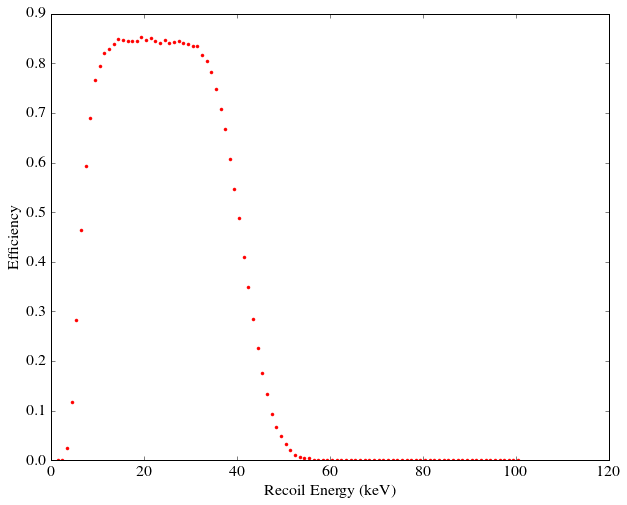

In [11]:
EffPlot=plt.plot(Er,eff, "r.")
plt.xlabel("Recoil Energy (keV)")
plt.ylabel("Efficiency")
plt.show()

## Differential Rate (based on Lewin and Smith) for a Wimps Mass of 35 GeV and $\sigma_p = 10^{-47}$

In [12]:
# Differential Rate for a Wimps mass of 35 GeV as a function of Er

mchi =35 # WIMP mass

xdiffrate=[] # = Recoil Energy-offset
diffrate=[]  

mreduite = MassReduced (mchi, A*0.9315)
mReduiteProton= MassReduced(mchi,938.2720*pow(10.,-3))

# Sigma Zero based on Lewun and Smith
sigmazero = sigmap*pow(A,2)*pow(mreduite,2)/pow(mReduiteProton,2) # Sigma_p = 10^-47 cm²

for i in range(0,2000):
    #Offset influence the efficiency not the differential rate
    xdiffrate.append(i*0.1+1)
    diffrate.append(Rate(sigmazero, rhozero, vent, mchi, mreduite, A,xdiffrate[i])) 
    
                                                        

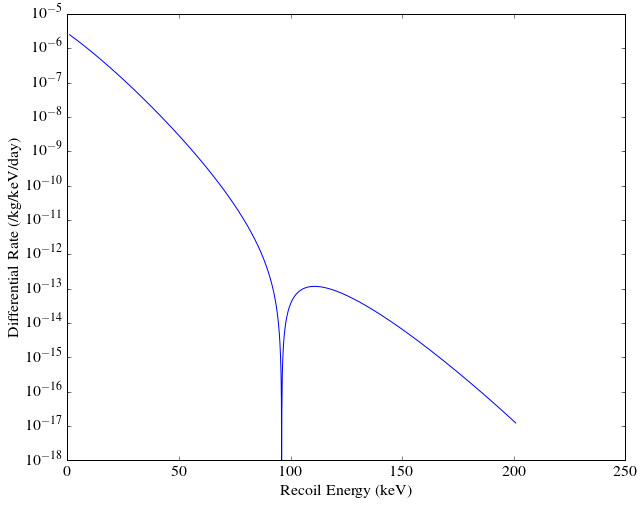

In [13]:
DiffPlot=plt.semilogy(xdiffrate,diffrate)
plt.xlabel("Recoil Energy (keV)")
plt.ylabel("Differential Rate (/kg/keV/day)")
plt.show()

## Number of event with XENON1T for a WIMP mass of 35 GeV and $\sigma_p = 10^{-47}$

Differential rate * detection efficiency => Number Of Event /kg/keV/day

In [14]:
# from scipy import signal
# NumberOfEvent_final=[]
# NumberOfEvent= signal.convolve(eff, diffrate) 
# for i in range(0,100):
#     NumberOfEvent_final.append(NumberOfEvent[i])

In [30]:
# # Get the Er values
# ErValues=DiffPlot[0].get_xdata()
# # Get Eff value
# EffValues=EffPlot[0].get_ydata()
# # Get Differential value
# DiffValues=DiffPlot[0].get_ydata()
# NumberOfEvent=[]
# #Efficiency * Differential Rate for each Recoil Energy
# NumberOfEvent=[]
# for i in range (0,len(Er)):
#     idx= np.where(ErValues==Er[i])
#     NumberOfEvent.append(np.convolve(DiffValues[idx],eff[i]))
# NumberOfEvent=np.concatenate(NumberOfEvent)

In [56]:

#Efficiency * Differential Rate for each Recoil Energy
NumberOfEvent=[]
for i in range (0,len(Er)):
    idx= np.where(ErValues==Er[i])
    NumberOfEvent.append(np.convolve(Rate(sigmazero, rhozero, vent, mchi, mreduite, A,Er[i]),eff[i]))
NumberOfEvent=np.concatenate(NumberOfEvent)

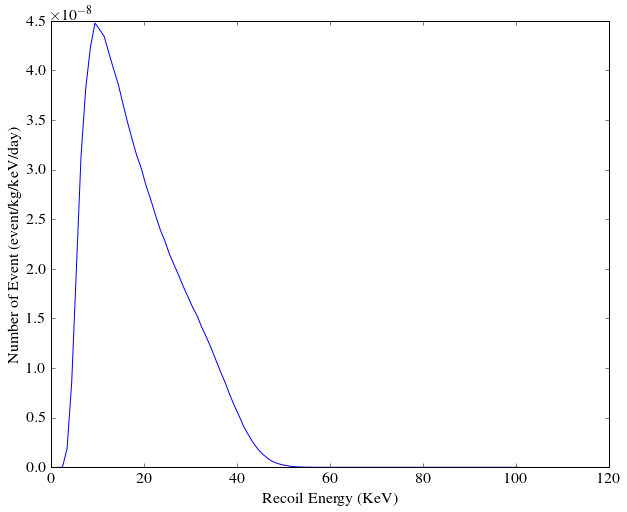

In [57]:
#plt.xlim(0,120)   
plt.plot(Er,NumberOfEvent)
plt.xlabel("Recoil Energy (KeV)")
plt.ylabel("Number of Event (event/kg/keV/day)")
plt.show()

In [18]:
# # Test PyROOT
# h = ROOT.TH2D("h","test ROOT",100,0,120,100,0,0.00007)
# h.SetTitle(";Er;Event")
# h.SetMarkerStyle(1)
# ROOT.gStyle.SetOptFit(1111)
# ROOT.gStyle.SetOptStat(0)

# for i in range (0,len(xer)):
#     h.Fill(xer[i], NumberOfEvent[i])

# print(h.Integral())
# h

# Event Rate as a function of the WIMP mass

In [70]:
from numpy import trapz
from scipy import integrate
n_mass=1000 
Xmass=[]    
Integral=[]

n = len(Er)  
for m in range (5,1000):
    Xmass.append(1.0*m) 
    mchi = 1.0*m
    mreduite = MassReduced (mchi, A*0.9315)
    mReduiteProton= MassReduced(mchi,938.2720*pow(10.,-3))
    sigmazero = (sigmap*pow(A,2)*pow(mreduite,2))/pow(mReduiteProton,2)   
    #eff*taux pour mchi = m 
    y=[]  
  #  h = ROOT.TH2D("h","test ROOT",100,0,120,100,0,0.00007)

    for i in range (0,n):
        y.append(np.convolve(Rate(sigmazero, rhozero, vent, mchi, mreduite, A, Er[i]),eff[i]))

    Integral.append(trapz(np.concatenate(y)))


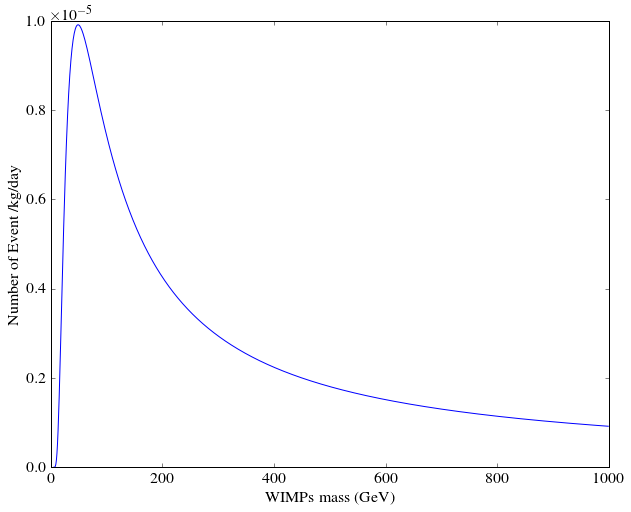

In [90]:
plt.plot(Xmass,Integral)
plt.ylabel("Number of Event /kg/day")
plt.xlabel("WIMPs mass (GeV)")
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,2))
plt.show()  

In [109]:
max_y = max(Integral)  # Find the maximum y value

where= np.where(Integral==max_y)
max_x= where[0]

print("Maximal Event Rate for a WIMP mass of", Xmass[max_x], "GeV.")


Maximal Event Rate for a WIMP mass of 49.0 GeV.


/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
